# L-Systems (Lindenmayer Systems) Lab

## Introduction

L-Systems are parallel rewriting systems that were introduced by Aristid Lindenmayer in 1968. They are particularly useful for modeling plant growth and generating fractals. In this lab, we'll explore how to create various patterns using L-Systems.

### Key Concepts:
- **Axiom**: The initial state/string
- **Production Rules**: Rules that define how to replace characters
- **Iterations**: Number of times to apply the rules
- **Turtle Graphics**: System for visualizing the L-System output

Let's start by importing our required libraries:

In [8]:
! pip install ColabTurtle

In [9]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output
import math
import matplotlib.pyplot as plt

## Part 1: Basic L-System Implementation

First, let's implement our core L-System functions. These will be used throughout the lab to generate and draw various patterns.

In [10]:
def create_l_system(iterations, axiom, rules):
    """Generate L-System instructions based on axiom and rules."""
    result = axiom
    for _ in range(iterations):
        new_string = ""
        for char in result:
            new_string += rules.get(char, char)
        result = new_string
    return result

def draw_l_system(instructions, angle, distance):
    """Draw the L-System using turtle graphics.

    Parameters:
    - instructions: string of L-System commands
    - angle: turning angle in degrees
    - distance: forward movement distance
    """
    stack = []
    for cmd in instructions:
        if cmd == 'F':  # Move forward and draw
            t.forward(distance)
        elif cmd == 'f':  # Move forward without drawing
            t.penup()
            t.forward(distance)
            t.pendown()
        elif cmd == '+':  # Turn right
            t.right(angle)
        elif cmd == '-':  # Turn left
            t.left(angle)
        elif cmd == '[':  # Save current state
            stack.append((t.position(), t.heading()))
        elif cmd == ']':  # Restore previous state
            position, heading = stack.pop()
            t.penup()
            t.goto(position)
            t.setheading(heading)
            t.pendown()

def setup_turtle():
        t.initializeTurtle()
        t.hideturtle()
        t.speed(13)  # Fastest speed
        t.penup()
        t.goto(t.window_width() // 2, t.window_height() - 50)  # Start position
        t.pendown()


## Exercise 1: Koch Curve

The Koch curve is a classic example of a fractal pattern. Let's create it using our L-System:

In [11]:
# Koch curve parameters
koch_axiom = "F"
koch_rules = {"F": "F+F-F-F+F"}
koch_iterations = 3
koch_angle = 90

# Generate and draw
setup_turtle()
t.pensize(2)
koch_instructions = create_l_system(koch_iterations, koch_axiom, koch_rules)
draw_l_system(koch_instructions, koch_angle, 5)

### Exercise 1 Tasks:
1. Try modifying the number of iterations (start with small numbers like 2-4)
2. Change the angle to 60 degrees and observe the difference
3. Modify the rules to create your own variation
4. Try changing the distance parameter

Note: Be careful with high iteration numbers as they can create very complex patterns!

## Exercise 2: Plant Generation

Now let's create a more complex L-System that generates plant-like structures. This system uses brackets to create branches:

In [12]:
# Plant parameters
plant_axiom = "X"
plant_rules = {
    "X": "F+[[X]-X]-F[-FX]+X",
    "F": "FF"
}
plant_iterations = 4
plant_angle = 25

# Generate and draw
setup_turtle()
t.pensize(1)
plant_instructions = create_l_system(plant_iterations, plant_axiom, plant_rules)
draw_l_system(plant_instructions, plant_angle, 10)

## Challenge: Create a Fractal Tree

Now it's your turn to experiment! Below is a template for creating a fractal tree. Try modifying the parameters to create different tree shapes:

In [13]:
# Your fractal tree parameters
tree_axiom = "F"  # Start with a single trunk
tree_rules = {"F": "F[+F]F[-F]F"}  # Basic branching rule
tree_iterations = 3
tree_angle = 30

# Generate and draw
setup_turtle()
t.pensize(2)
tree_instructions = create_l_system(tree_iterations, tree_axiom, tree_rules)
draw_l_system(tree_instructions, tree_angle, 10)

#Generative Arts

In [14]:
def create_l_system(iterations, axiom, rules):
    """Generate L-System instruction string from axiom and rewriting rules."""
    result = axiom
    for _ in range(iterations):
        result = "".join(rules.get(ch, ch) for ch in result)
    return result

In [15]:
def thickness_from_depth(depth, base=1.2, decay=0.68):
    """Thicker trunk, thinner branches."""
    return base * (decay ** depth)


In [16]:
def _segments_from_commands(commands, angle_deg, step, draw_symbols={"F"}):
    x, y = 0.0, 0.0
    heading = 0.0
    stack = []
    depth = 0
    segs = []
    idx = 0
    ang = math.radians(angle_deg)

    for ch in commands:

        # Draw forward
        if ch in draw_symbols:
            x1 = x + step * math.cos(heading)
            y1 = y + step * math.sin(heading)
            segs.append((x, y, x1, y1, depth, idx))
            idx += 1
            x, y = x1, y1

        # Move forward without drawing
        elif ch == "f":
            x += step * math.cos(heading)
            y += step * math.sin(heading)

        # Turn left/right
        elif ch == "+":
            heading += ang
        elif ch == "-":
            heading -= ang

        # Branch push/pop
        elif ch == "[":
            stack.append((x, y, heading, depth))
            depth += 1

        elif ch == "]":
            x, y, heading, depth = stack.pop()

    return segs

In [23]:
def draw_l_system_matplotlib(
    instructions,
    angle,
    distance,
    draw_symbols={"F"},
    color_mode="progress",      # "progress" or "depth"
    thickness_mode="constant",  # "constant" or "depth"
    base_thickness=1.2,
    thickness_decay=0.68,
    title=""
):
    segs = _segments_from_commands(instructions, angle, distance, draw_symbols)

    if not segs:
        raise ValueError("No segments produced. Check rules/draw symbols.")

    # Normalize drawing to fit nicely
    xs = [s[0] for s in segs] + [s[2] for s in segs]
    ys = [s[1] for s in segs] + [s[3] for s in segs]

    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)

    cx, cy = (minx + maxx) / 2, (miny + maxy) / 2
    scale = max(maxx - minx, maxy - miny) or 1.0

    n = len(segs)
    max_depth = max(d for *_, d, __ in segs)

    # Create figure
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title(title, pad=10)

    # Draw each segment
    for (x0, y0, x1, y1, d, i) in segs:

        # Normalize coordinates
        X0 = (x0 - cx) / scale
        Y0 = (y0 - cy) / scale
        X1 = (x1 - cx) / scale
        Y1 = (y1 - cy) / scale

        # Color variation
        if color_mode == "depth":
            tcol = 0.0 if max_depth == 0 else d / max_depth
        else:
            tcol = i / max(1, n - 1)

        # Thickness variation
        if thickness_mode == "depth":
            lw = thickness_from_depth(d, base=base_thickness, decay=thickness_decay)
        else:
            lw = base_thickness

        ax.plot(
            [X0, X1],
            [Y0, Y1],
            linewidth=lw,
            alpha=0.95,
            color=plt.cm.viridis(tcol)
        )

    plt.show()

In [24]:
SYSTEMS = {
    "Square Weave": dict(
        axiom="F-F-F-F",
        rules={"F": "F+F-F-F+F"},
        angle=90,
        distance=1.0,
        draw_symbols={"F"},
    ),

    "Dragon Curve": dict(
        axiom="FX",
        rules={"X": "X+YF+", "Y": "-FX-Y"},
        angle=90,
        distance=1.0,
        draw_symbols={"F"},
    ),

    "Hilbert Curve": dict(
        axiom="A",
        rules={"A": "+BF-AFA-FB+", "B": "-AF+BFB+FA-"},
        angle=90,
        distance=1.0,
        draw_symbols={"F"},
    ),
}


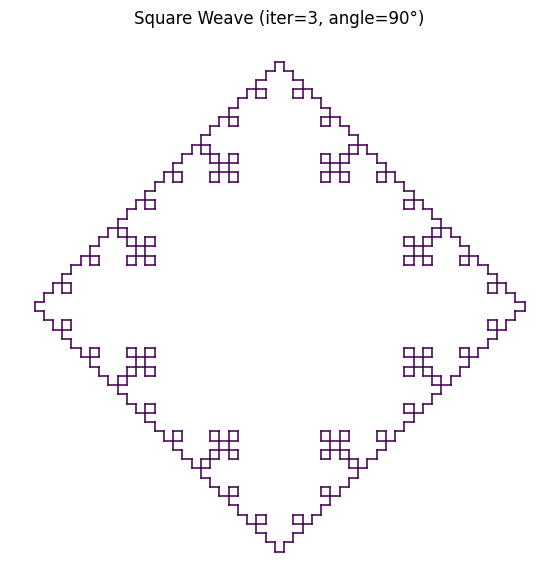

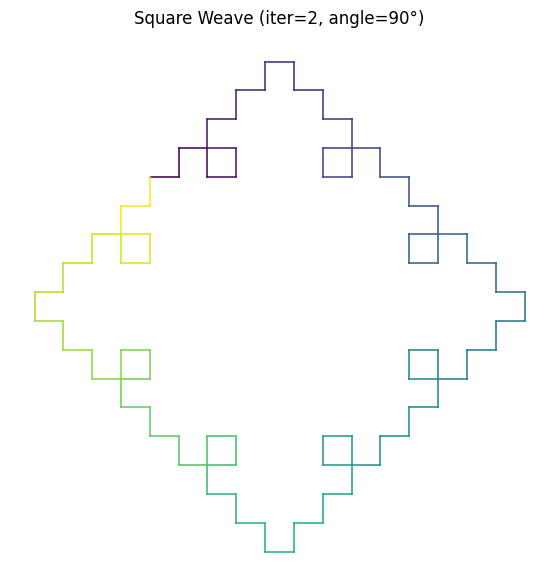

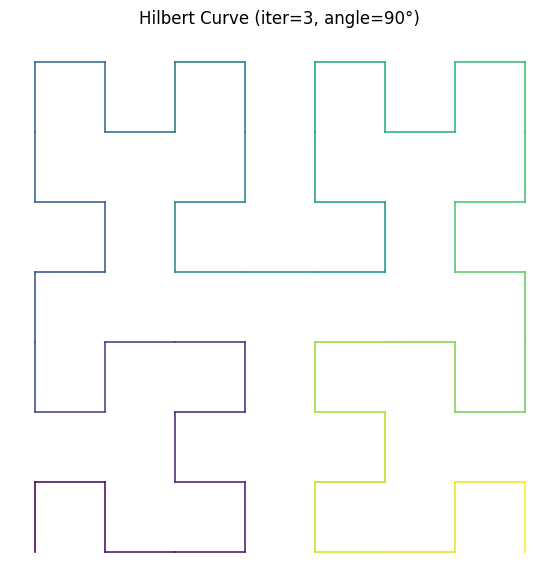

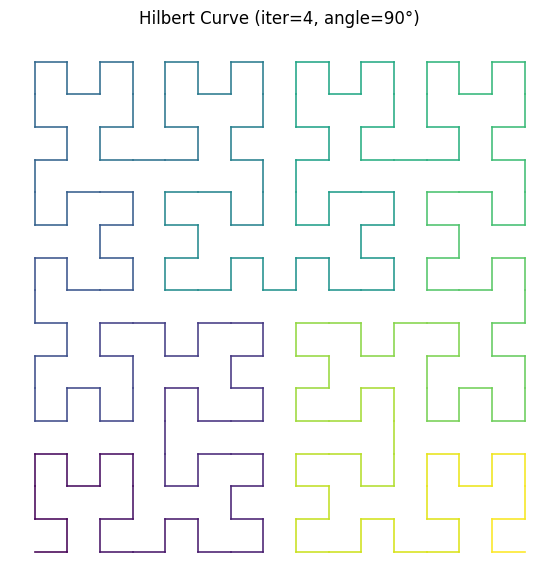

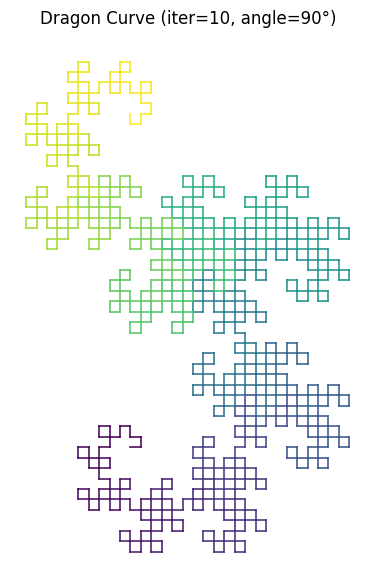

In [25]:
def run_5_outcomes():
    outcomes = [
        ("Square Weave", 3, "depth", "constant"),
        ("Square Weave", 2, "progress", "constant"),
        ("Hilbert Curve", 3, "progress", "constant"),
        ("Hilbert Curve", 4, "progress", "constant"),
        ("Dragon Curve", 10, "progress", "constant"),
    ]

    for name, iters, c_mode, t_mode in outcomes:
        spec = SYSTEMS[name]
        instr = create_l_system(iters, spec["axiom"], spec["rules"])

        draw_l_system_matplotlib(
            instr,
            angle=spec["angle"],
            distance=spec["distance"],
            draw_symbols=spec["draw_symbols"],
            color_mode=c_mode,
            thickness_mode=t_mode,
            base_thickness=1.2,
            thickness_decay=0.68,
            title=f"{name} (iter={iters}, angle={spec['angle']}°)"
        )

run_5_outcomes()
